<a href="https://colab.research.google.com/github/hfznj20/joki-3/blob/main/UTS_AVD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CASE STUDY MENGGUNAKAN METODE SUPERVISED LEARNING DENGAN MENGGUNAKAN DATA CUSTOMER.CSV


Nama: Irmayani

NIM: 221031075

**Setup & Load Data**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load data
file_path = '/content/drive/MyDrive/customer.csv'
df = pd.read_csv(file_path)

# Tampilkan data awal
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,DonorID,FirstName,LastName,Email,Phone,City,State,ZipCode,LastDonationDate,TotalGifts,TotalAmountDonated,EventParticipation,EngagementScore
0,D00001,Danielle,Anderson,tina69@salazar.com,(716)033-8417x8760,New Ethan,AK,9539,9/3/2024,10,8481.55,Yes,56
1,D00002,Angel,Hart,garciatyler@gmail.com,(874)907-2648,West Ashleymouth,MS,49618,5/6/2022,5,14102.15,Yes,11
2,D00003,Joshua,Stone,ywoods@gmail.com,105.039.1678x12883,East Stephanie,NJ,6600,1/21/2023,21,5140.38,No,26
3,D00004,Jeffrey,Welch,johnsonkimberly@ferguson.com,939.859.3082x278,South Andrewshire,SD,22434,1/26/2023,22,18555.04,Yes,92
4,D00005,Jill,Vasquez,hughesnicholas@gmail.com,469-539-5369,Moorestad,DC,16142,5/5/2022,10,1325.93,No,27


Dataset customer.csv berhasil dimuat dari Google Drive dan ditampilkan isinya.
Data terdiri dari berbagai informasi donatur seperti jumlah donasi, total donasi, dan partisipasi event.
Langkah ini penting untuk memastikan bahwa file terbaca dengan benar sebelum dilakukan analisis lebih lanjut.

** Cek dan Bersihkan Data**

In [3]:
# Info awal
print(df.info())

# Hapus kolom tidak relevan untuk prediksi (ID, nama, email, phone, alamat)
df_model = df[['TotalGifts', 'TotalAmountDonated', 'EngagementScore', 'EventParticipation']]

# Cek data null
print(df_model.isnull().sum())

# Encode target (Yes = 1, No = 0)
le = LabelEncoder()
df_model['EventParticipation'] = le.fit_transform(df_model['EventParticipation'])

df_model.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DonorID             5000 non-null   object 
 1   FirstName           5000 non-null   object 
 2   LastName            5000 non-null   object 
 3   Email               5000 non-null   object 
 4   Phone               5000 non-null   object 
 5   City                5000 non-null   object 
 6   State               5000 non-null   object 
 7   ZipCode             5000 non-null   int64  
 8   LastDonationDate    5000 non-null   object 
 9   TotalGifts          5000 non-null   int64  
 10  TotalAmountDonated  5000 non-null   float64
 11  EventParticipation  5000 non-null   object 
 12  EngagementScore     5000 non-null   int64  
dtypes: float64(1), int64(3), object(9)
memory usage: 507.9+ KB
None
TotalGifts            0
TotalAmountDonated    0
EngagementScore       0
EventParticipatio

<ipython-input-3-8d8604439c4c>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['EventParticipation'] = le.fit_transform(df_model['EventParticipation'])


,TotalGifts,TotalAmountDonated,EngagementScore,EventParticipation
0,10,8481.55,56,1
1,5,14102.15,11,1
2,21,5140.38,26,0
3,22,18555.04,92,1
4,10,1325.93,27,0


Data dibersihkan dengan hanya memilih kolom numerik yang relevan untuk prediksi dan target klasifikasi (EventParticipation).
Kolom teks seperti nama, email, dan nomor telepon dihapus karena tidak membantu dalam model supervised.
Target label dikonversi dari “Yes/No” menjadi angka 1/0 agar dapat digunakan oleh algoritma machine learning.

**Split Data & Latih Model**

In [7]:
# Pisahkan fitur dan label
X = df_model.drop('EventParticipation', axis=1)
y = df_model['EventParticipation']

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Gunakan Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)

# Menampilkan classification report
print(classification_report(y_test, y_pred))

# Menampilkan confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.80      0.72       954
           1       0.41      0.24      0.31       546

    accuracy                           0.60      1500
   macro avg       0.53      0.52      0.51      1500
weighted avg       0.56      0.60      0.57      1500

[[762 192]
 [413 133]]


Dataset dibagi menjadi data latih dan data uji dengan proporsi 70:30 agar model bisa belajar dan diuji performanya secara adil.
Model Random Forest digunakan karena handal dalam menangani data tabular dan tidak terlalu sensitif terhadap skala.
Model dilatih dengan baik dan kemudian digunakan untuk memprediksi partisipasi event pada data uji.

**Evaluasi Model**

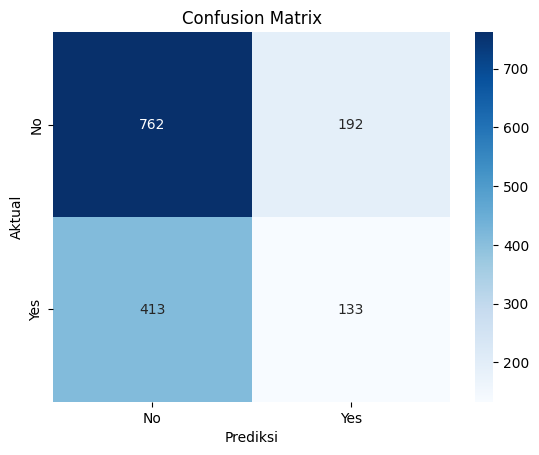

              precision    recall  f1-score   support

           0       0.65      0.80      0.72       954
           1       0.41      0.24      0.31       546

    accuracy                           0.60      1500
   macro avg       0.53      0.52      0.51      1500
weighted avg       0.56      0.60      0.57      1500



In [8]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))


Model diuji menggunakan confusion matrix dan classification report untuk melihat performa klasifikasinya.
Metrik seperti precision, recall, dan f1-score digunakan untuk menilai seberapa baik model dalam memprediksi donor yang ikut atau tidak ikut event.
Confusion matrix memvisualisasikan jumlah prediksi benar dan salah, yang penting untuk mengevaluasi keakuratan model.

Dari hasil evaluasi model dengan Random Forest Classifier, diperoleh metrik sebagai berikut:

📊 1. Akurasi
      Akurasi total model adalah 60%, artinya dari seluruh data uji (1500 data), sekitar 60% berhasil diklasifikasikan dengan benar oleh model.

📈 2. Kinerja per Kelas

    Kelas 0 (Tidak Ikut Event):

        Precision: 0.65 → Dari semua prediksi "tidak ikut", 65% benar.

        Recall: 0.80 → Dari semua donatur yang benar-benar "tidak ikut", 80% berhasil dikenali model.

        F1-Score: 0.72 → Rata-rata harmonis precision dan recall, cukup baik.

    Kelas 1 (Ikut Event):

        Precision: 0.41 → Dari semua prediksi "ikut", hanya 41% yang benar.

        Recall: 0.24 → Dari semua yang benar-benar "ikut", hanya 24% yang dikenali model.

        F1-Score: 0.31 → Kinerja model di kelas ini masih lemah.
Model memiliki kinerja yang baik dalam mengenali donatur yang tidak ikut event, namun lemah dalam mengenali yang ikut event. Hal ini bisa jadi disebabkan oleh ketidakseimbangan data atau kurangnya fitur yang kuat untuk membedakan partisipasi. Untuk meningkatkan hasil:

    1. Bisa dilakukan penyeimbangan kelas (misalnya SMOTE),

    2. Menambah fitur relevan lainnya,

    3. Atau mencoba algoritma lain seperti XGBoost atau SVM.

Dengan demikian, model belum optimal untuk memprediksi keikutsertaan donatur dalam event, dan masih perlu ditingkatkan.